# Project-FRA503 Machine Learning

### 1. Data Exploration

**Market Segmentation in Insurance**

Link : 
https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised

In marketing, market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into subgroups of consumers based on some type of shared characteristics.

Objective :
This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### **1.1 Read data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Customer Data.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [34]:
df.shape

(8950, 18)

#### **1.2 Find missing value**

In [35]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### **1.3 Seperate categorical and numeric data**

**Categorical data**

1. CUST_ID

In [3]:
import numpy as np

In [4]:
catDf = df.select_dtypes(exclude=np.number)
catDf.head()

CUST_ID
0  C10001
1  C10002
2  C10003
3  C10004
4  C10005

**Numeric data**

1. BALANCE : เงินคงเหลือของ credit card เฉลี่ยต่อเดือน
2. BALANCE_FREQUENCY : อัตราส่วนของ 12 เดือนล่าสุด กับ เงินคงเหลือ
3. PURCHASES : จำนวนเงินทั้งหมดที่ใช้
4. ONEOFF_PURCHASES : จำนวนเงินที่ใช้ creadit card จ่ายทีเดียว
5. INSTALLMENTS_PURCHASES : จำนวนเงินที่ใช้ creadit card จ่ายแบบผ่อน
6. CASH_ADVANCE : จำนวนเงินสดที่ถอนจาก credit card
7. PURCHASES_FREQUENCY : ความถี่ที่ใช้ creadit card จ่ายเงิน
8. ONEOFF_PURCHASES_FREQUENCY : ความถี่ที่ใช้ creadit card จ่ายทีเดียว
9. PURCHASES_INSTALLMENTS_FREQUENCY : ความถี่ที่ใช้ creadit card จ่ายแบบผ่อน
10. CASH_ADVANCE_FREQUENCY : ความถี่ที่ถอนเงินสดที่ถอนจาก credit card
11. CASH_ADVANCE_TRX : จำนวนเงินเฉลี่ยที่ถอนจาก credit card 1 ครั้ง
12. PURCHASES_TRX : จำนวนเงินเฉลี่ยต่อการใช้ credit card 1 ครั้ง
13. CREDIT_LIMIT : วงเงินจำกัดของ credit card
14. PAYMENTS : จำนวนเงินที่ชำระ credit card 
15. MINIMUM_PAYMENTS : จำนวนเงินที่ชำระขั้นต่ำ
16. PRC_FULL_PAYMENT : เปอร์เซ็นต์ของเดือน กับ จำนวนเงินชำระทั้งหมดของใบแจ้งยอด
17. TENURE : จำนวนเดือนที่เป็นลูกค้ามา

**Assumption**

จำนวนเงินและลักษณะการใช้งาน credit card ทำให้เห็นถึงการแบ่งกลุ่มลุกค้าได้ ดังนั้น BALANCE, PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CREDIT_LIMIT, PAYMENTS เป็น features ที่ส่งผลให้เห็นถึงกลุ่มลูกค้าที่แตกต่างกันได้ 

In [5]:
numDf = df.select_dtypes(include=np.number)
numDf.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [41]:
selectedCol = ['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 
               'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
               'CREDIT_LIMIT', 'PAYMENTS']
selectedNumDf = numDf[selectedCol]
selectedNumDf.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                    0.000000   
1  3202.467416       0.00             0.000000                    0.000000   
2  2495.148862     773.17             1.000000                    1.000000   
3  1666.670542    1499.00             0.083333                    0.083333   
4   817.714335      16.00             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                          0.083333        1000.0   201.802084  
1                          0.000000        7000.0  4103.032597  
2                          0.000000        7500.0   622.066742  
3                          0.000000        7500.0     0.000000  
4                          0.000000        1200.0   678.334763

#### **1.4 Visualize numeric data**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [64]:
import math

def histPlot(df, y, n):
    col = df.columns
    fig,ax = plt.subplots(math.ceil(n/4), 4, figsize=(30,math.ceil(n/4)*6))

    i = 0
    for j in range(len(col)):
        sns.histplot(data=df, x=col[j], hue=y, kde=True, ax=ax[i][j%4])
        if j%4 == 3:
            i += 1
    plt.show()

**Correlation between features**

<AxesSubplot:>

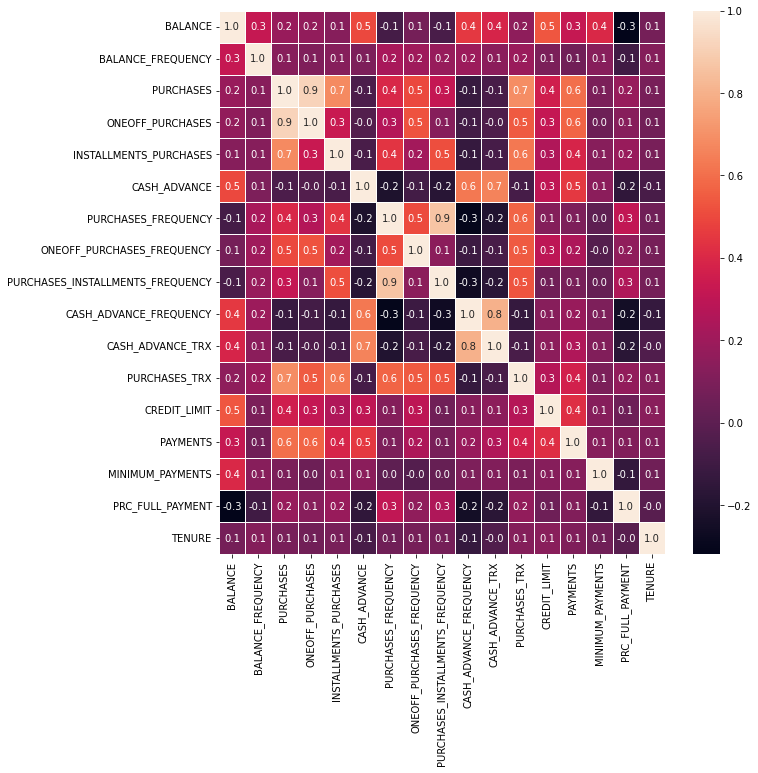

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=numDf.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

<AxesSubplot:>

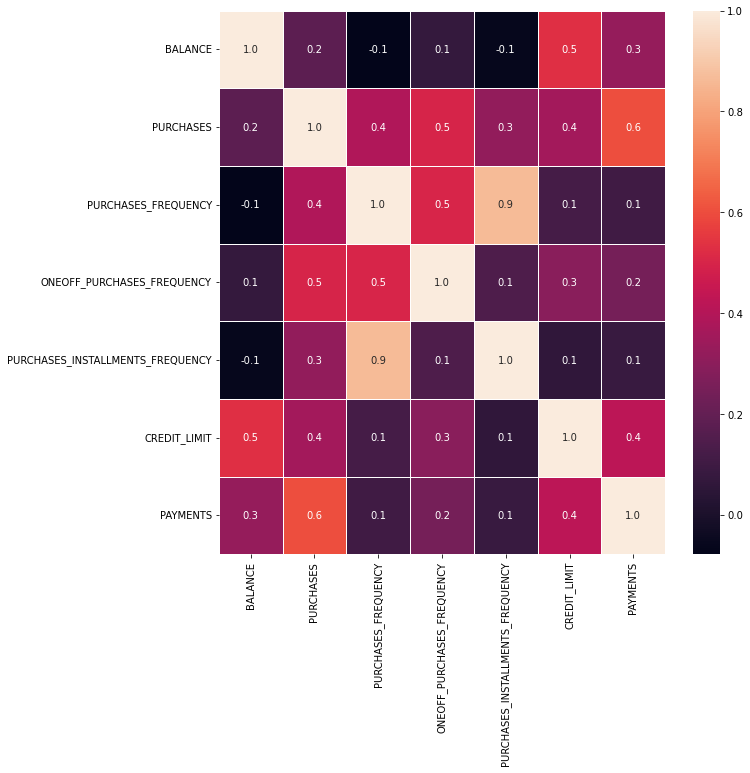

In [118]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=selectedNumDf.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

- BALANCES กับ CREDIT_LIMIT, PURCHASES กับ PAYMENTS มีความสัมพันธ์กัน

**BALANCE**

In [45]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [85]:
numDfGroup1 = selectedNumDf.copy()
num = [0, 128.28, 873.39, 2054.14, 19043.14]
balanceGroup=['1','2','3','4']
numDfGroup1['BALANCE']=pd.cut(df['BALANCE'], num, labels= balanceGroup)
numDfGroup1.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0       1      95.40             0.166667                    0.000000   
1       4       0.00             0.000000                    0.000000   
2       4     773.17             1.000000                    1.000000   
3       3    1499.00             0.083333                    0.083333   
4       2      16.00             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                          0.083333        1000.0   201.802084  
1                          0.000000        7000.0  4103.032597  
2                          0.000000        7500.0   622.066742  
3                          0.000000        7500.0     0.000000  
4                          0.000000        1200.0   678.334763

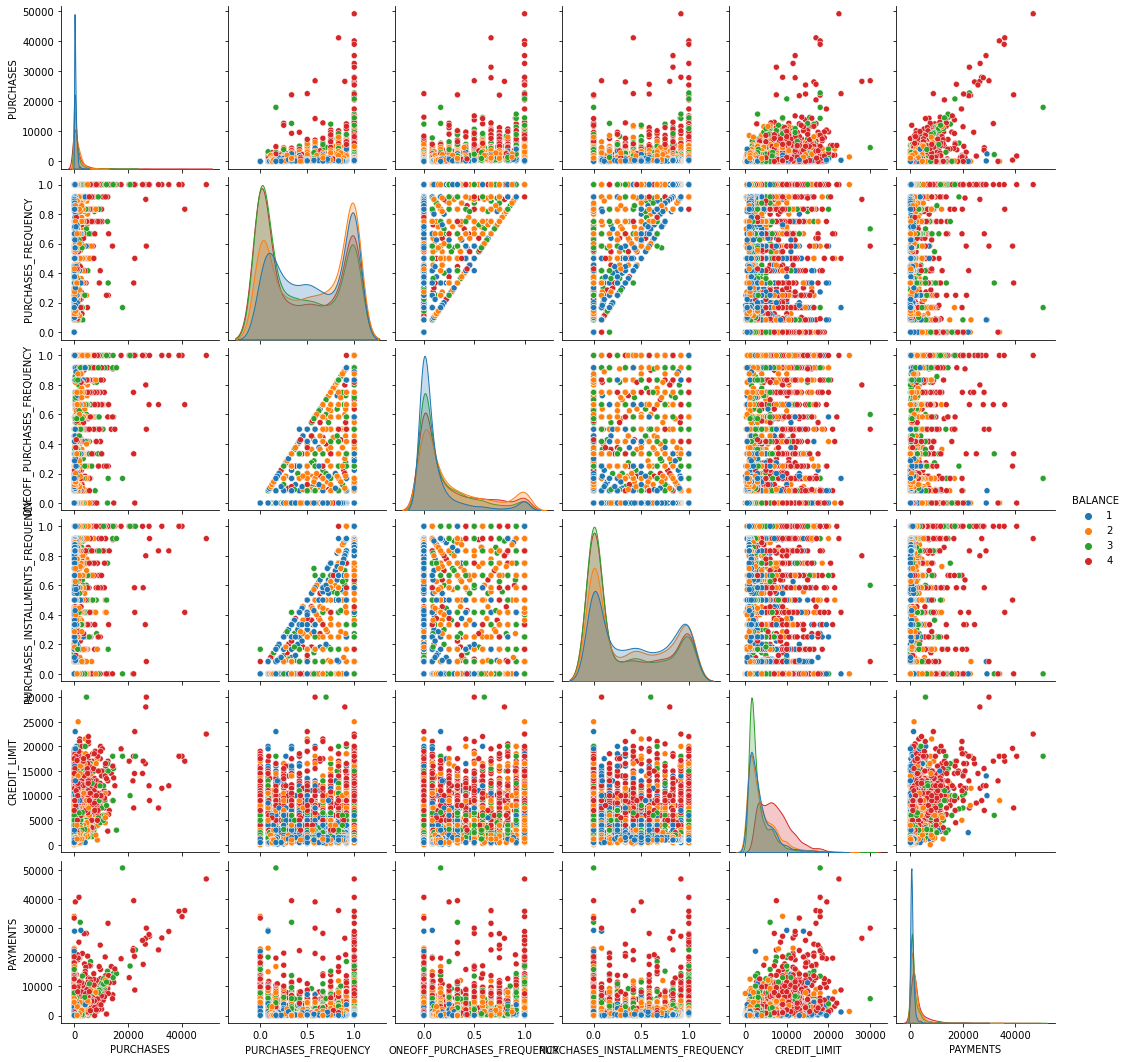

In [86]:
sns.pairplot(data=numDfGroup1, hue='BALANCE')

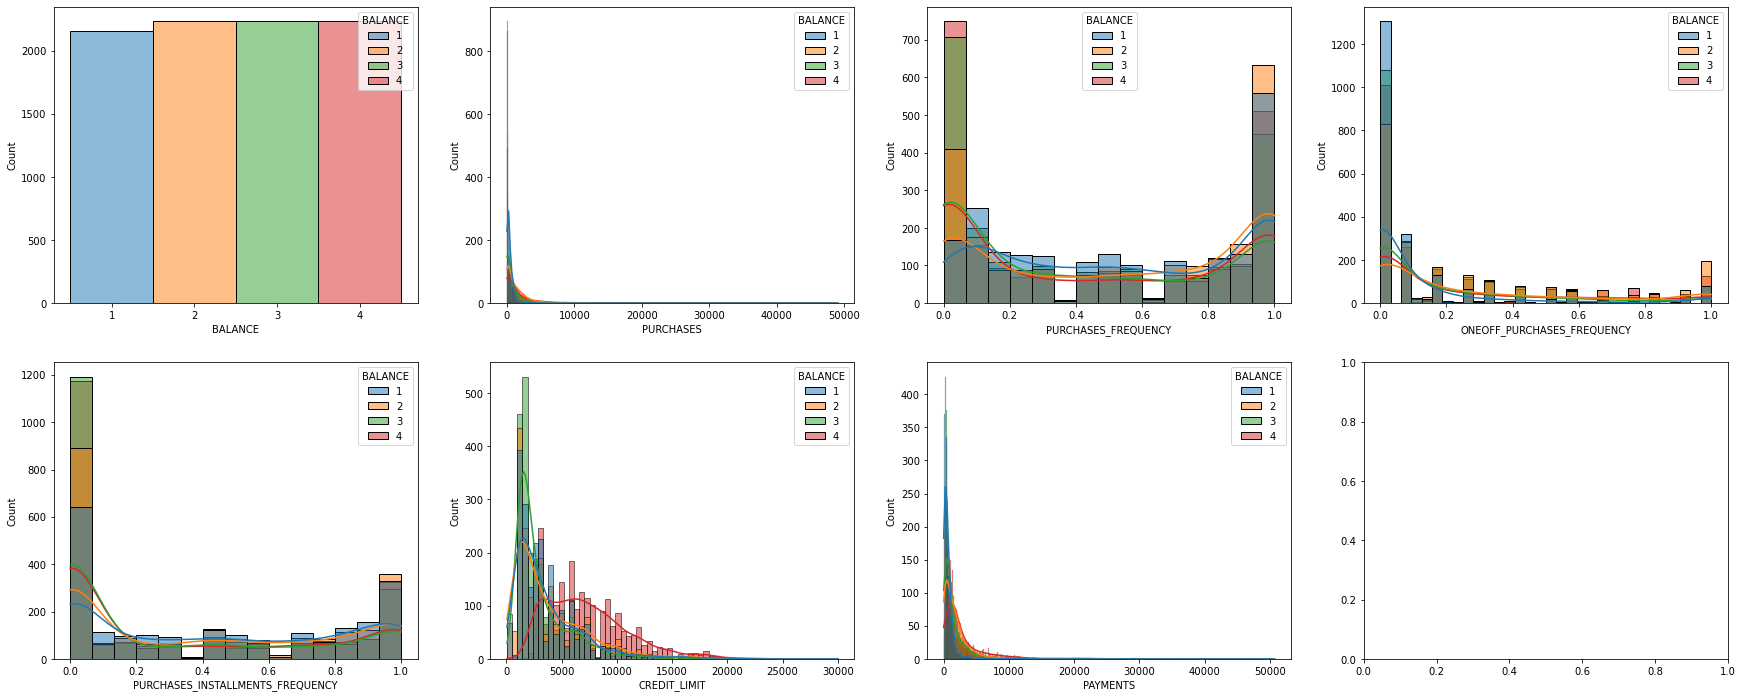

In [89]:
histPlot(numDfGroup1, 'BALANCE', 7)

- คนที่มี BALANCE สูง จะมี PURCHASES สูงตามไปด้วย แต่คนที่มี BALANCE ต่ำ มีทั้งกลุ่มที่มี PURCHASES ต่ำและปานกลาง

**PURCHASES**

In [7]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [93]:
numDfGroup2 = selectedNumDf.copy()
num = [-0.01, 39.635, 361.28, 1110.13, 49039.57]
balanceGroup=['1','2','3','4']
numDfGroup2['PURCHASES']=pd.cut(df['PURCHASES'], num, labels= balanceGroup)
numDfGroup2.head()

BALANCE PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749         2             0.166667                    0.000000   
1  3202.467416         1             0.000000                    0.000000   
2  2495.148862         3             1.000000                    1.000000   
3  1666.670542         4             0.083333                    0.083333   
4   817.714335         1             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                          0.083333        1000.0   201.802084  
1                          0.000000        7000.0  4103.032597  
2                          0.000000        7500.0   622.066742  
3                          0.000000        7500.0     0.000000  
4                          0.000000        1200.0   678.334763

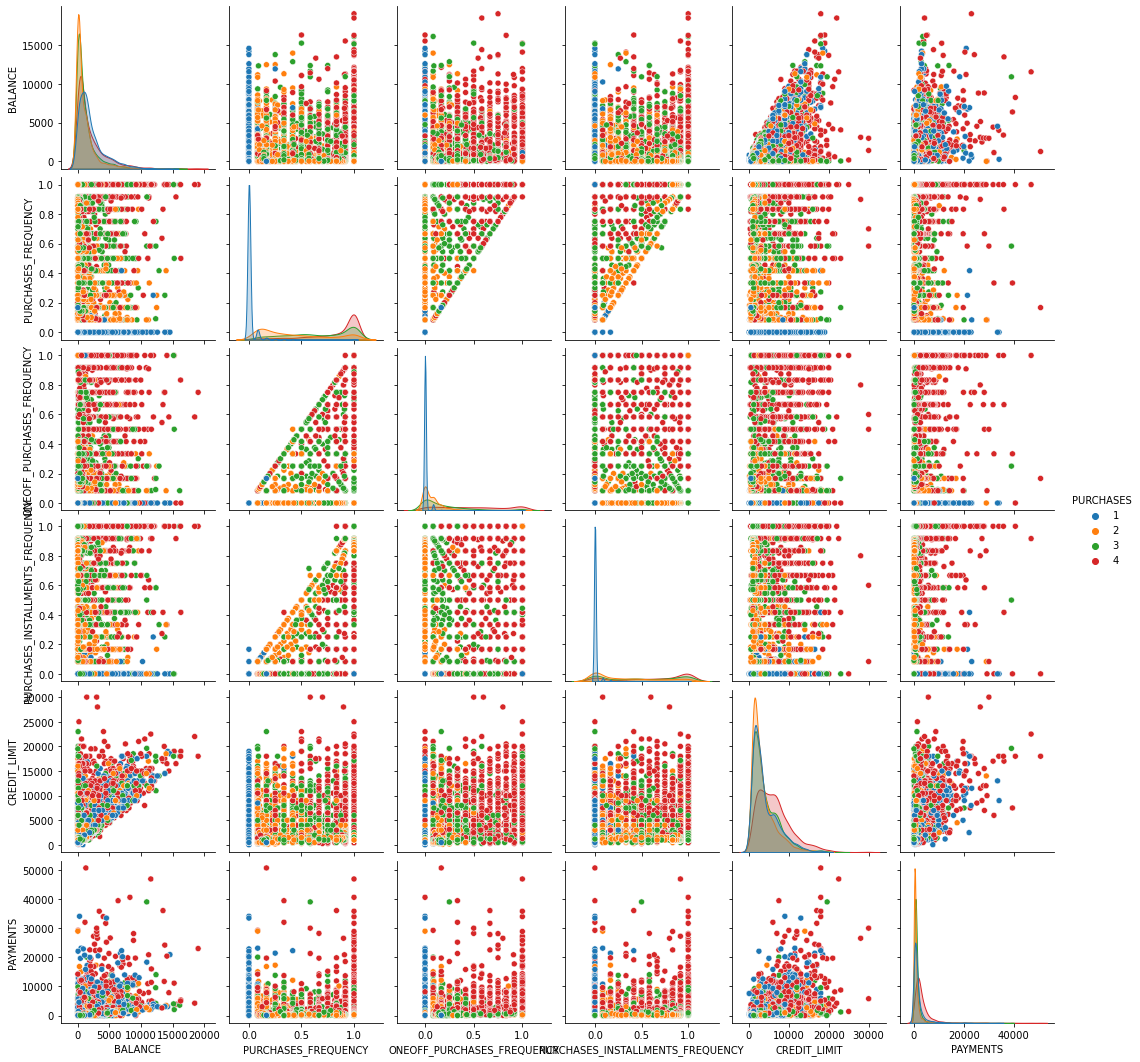

In [94]:
sns.pairplot(data=numDfGroup2, hue='PURCHASES')

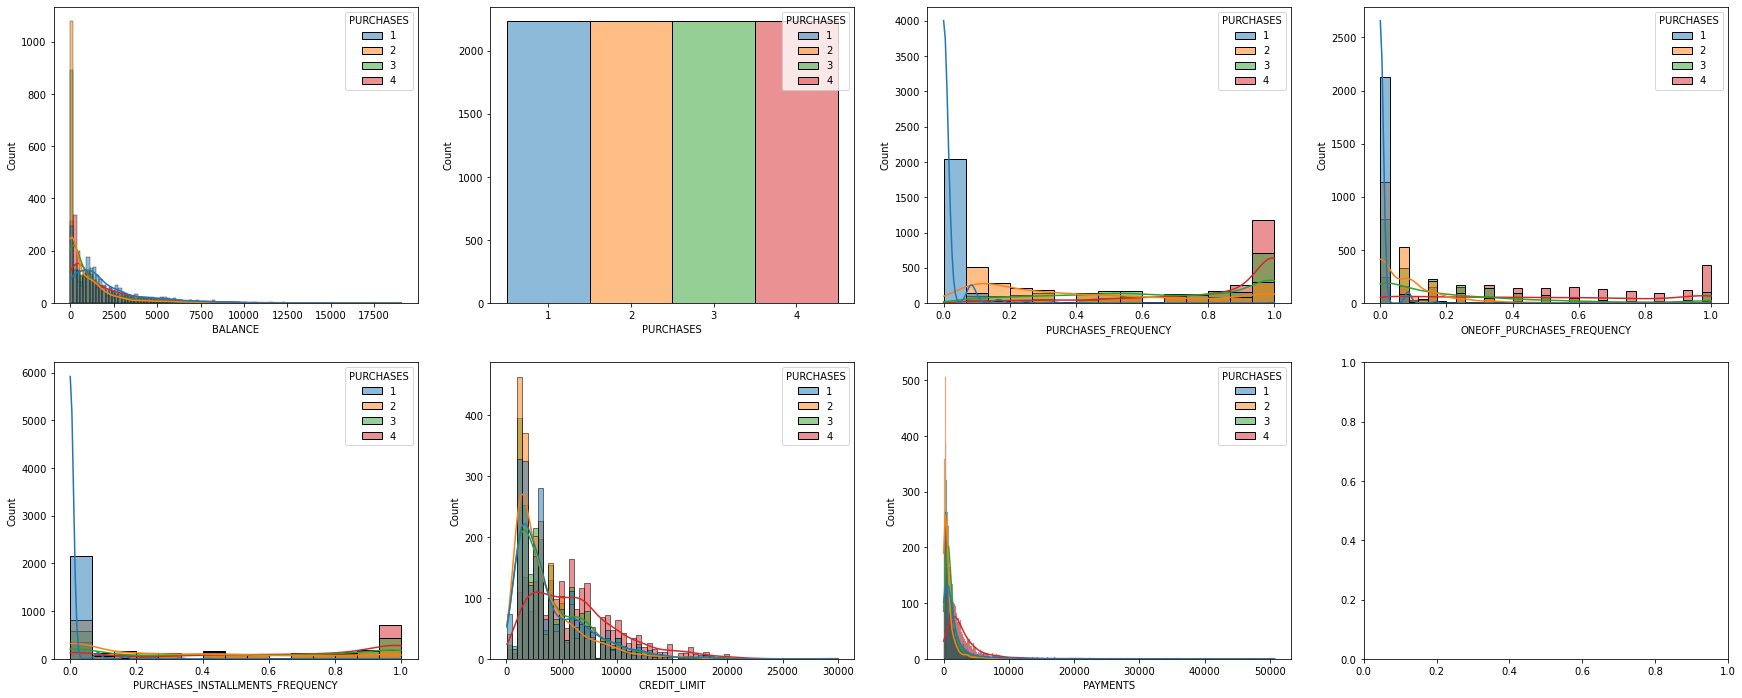

In [95]:
histPlot(numDfGroup2, 'PURCHASES', 7)

- คนที่มี PURCHASES ค่อนไปทางน้อย ส่วนใหญ่จะมี PAYMENTS ที่น้อย

**PURCHASES_FREQUENCY**

In [14]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [96]:
numDfGroup3 = selectedNumDf.copy()
num = [-0.001, 0.083, 0.5, 0.917, 1.00]
balanceGroup=['1','2','3','4']
numDfGroup3['PURCHASES_FREQUENCY']=pd.cut(df['PURCHASES_FREQUENCY'], num, labels= balanceGroup)
numDfGroup3.head()

BALANCE  PURCHASES PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40                   2                    0.000000   
1  3202.467416       0.00                   1                    0.000000   
2  2495.148862     773.17                   4                    1.000000   
3  1666.670542    1499.00                   2                    0.083333   
4   817.714335      16.00                   2                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                          0.083333        1000.0   201.802084  
1                          0.000000        7000.0  4103.032597  
2                          0.000000        7500.0   622.066742  
3                          0.000000        7500.0     0.000000  
4                          0.000000        1200.0   678.334763

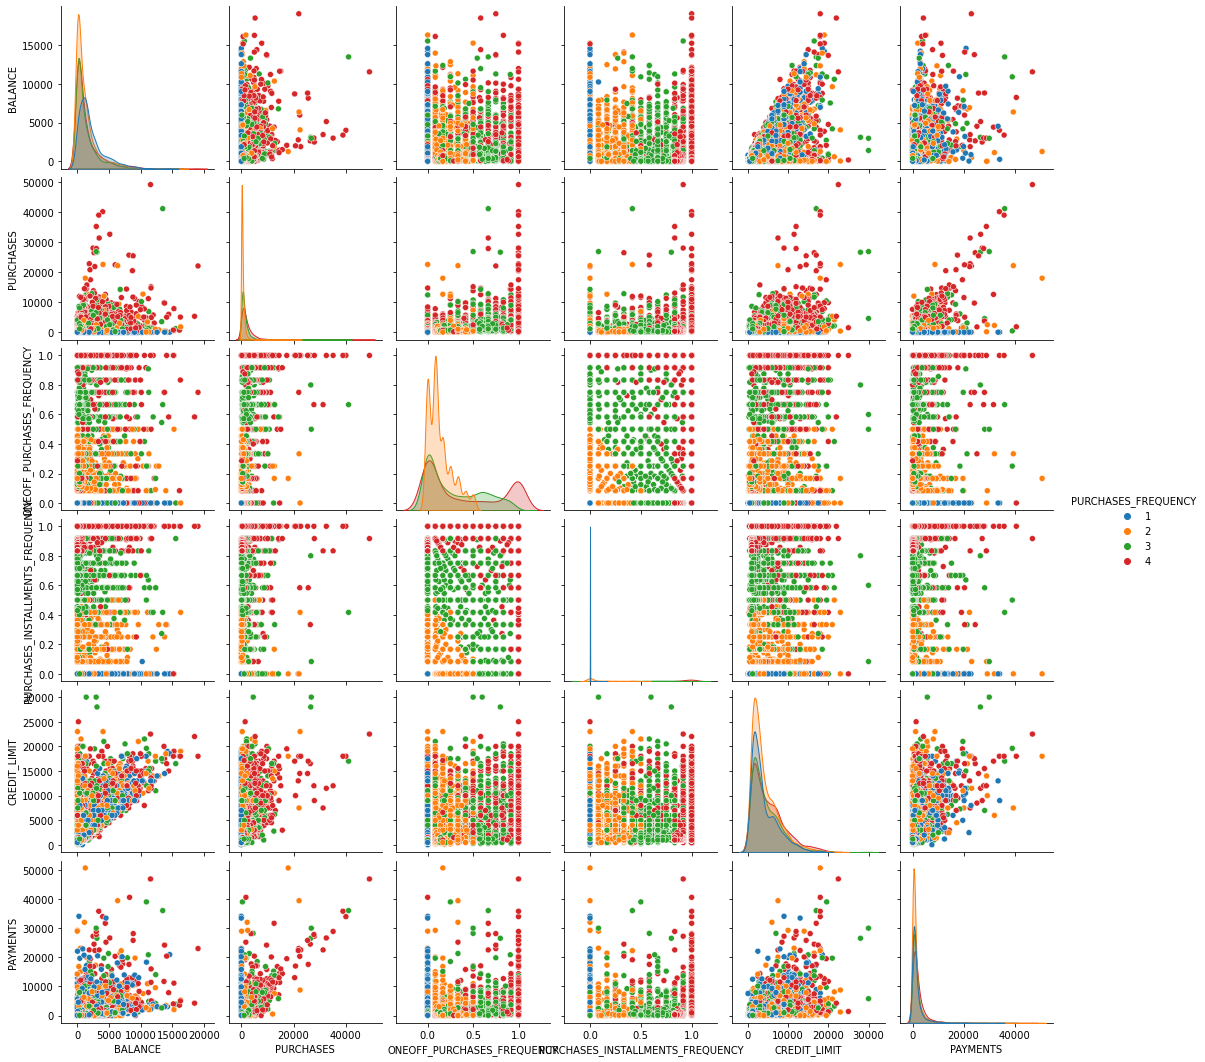

In [97]:
sns.pairplot(data=numDfGroup3, hue='PURCHASES_FREQUENCY')

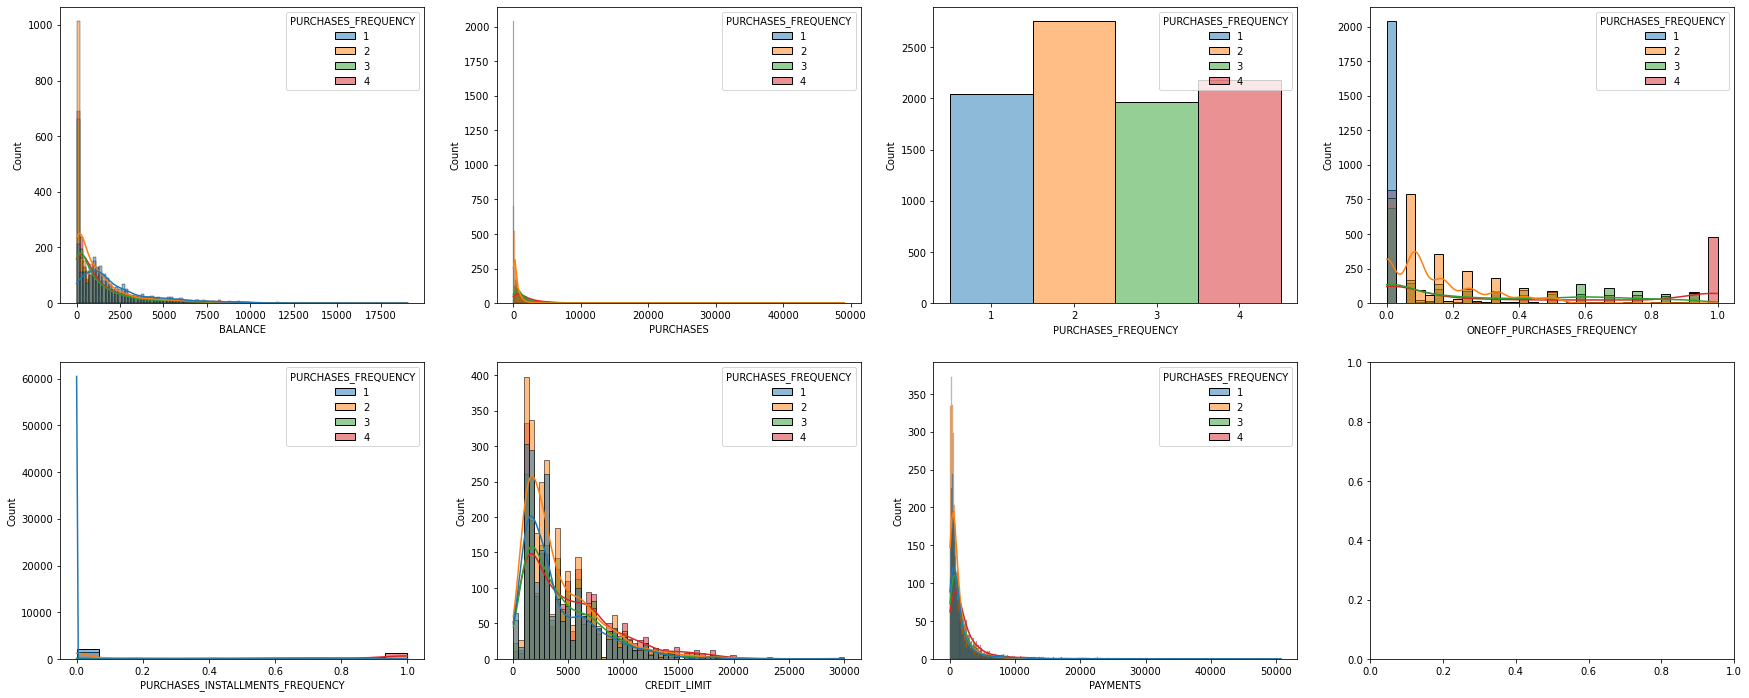

In [100]:
histPlot(numDfGroup3, 'PURCHASES_FREQUENCY', 7)

- คนที่ไม่ค่อยใช้จ่าย ส่วนใหญ่จะมี PURCHASES_INSTALLMENTS_FREQUENCY น้อย แต่จะมี INEOFF_PURCHASES มากกว่า
- คนที่มี PURCHASES_INSTALLMENTS_FREQUENCY สูง ส่วนใหญ่จะมี PURCHASES_FREQUENCY สูงด้วย

**ONEOFF_PURCHASES_FREQUENCY**

In [101]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [103]:
numDfGroup4 = selectedNumDf.copy()
num = [-0.001, 0.083, 0.3, 1.00]
balanceGroup=['1','2','3']
numDfGroup4['ONEOFF_PURCHASES_FREQUENCY']=pd.cut(df['ONEOFF_PURCHASES_FREQUENCY'], num, labels= balanceGroup)
numDfGroup4.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                          1   
1  3202.467416       0.00             0.000000                          1   
2  2495.148862     773.17             1.000000                          3   
3  1666.670542    1499.00             0.083333                          2   
4   817.714335      16.00             0.083333                          2   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                          0.083333        1000.0   201.802084  
1                          0.000000        7000.0  4103.032597  
2                          0.000000        7500.0   622.066742  
3                          0.000000        7500.0     0.000000  
4                          0.000000        1200.0   678.334763

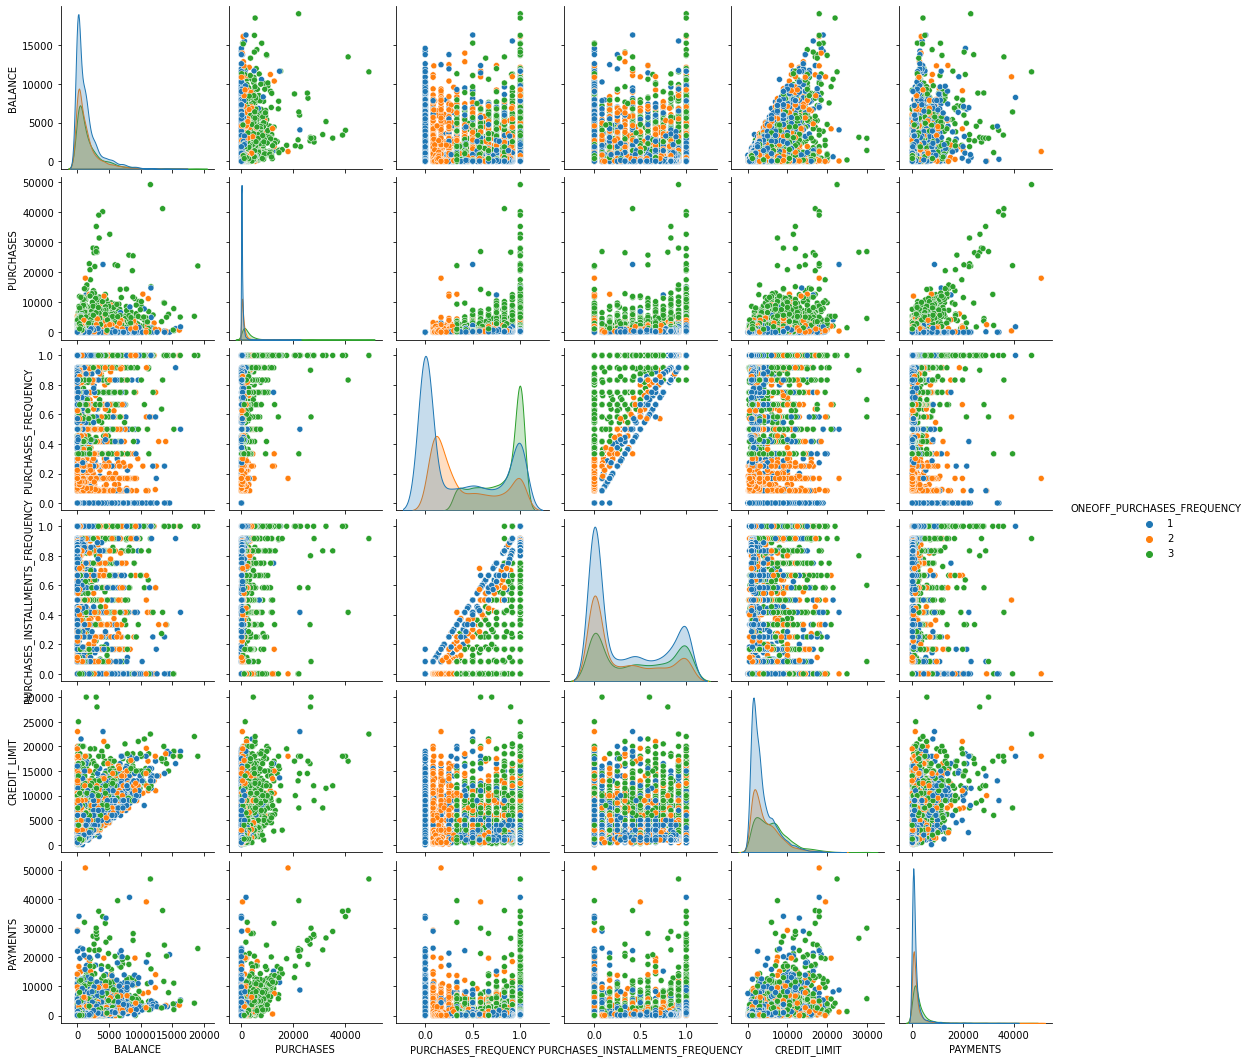

In [104]:
sns.pairplot(data=numDfGroup4, hue='ONEOFF_PURCHASES_FREQUENCY')

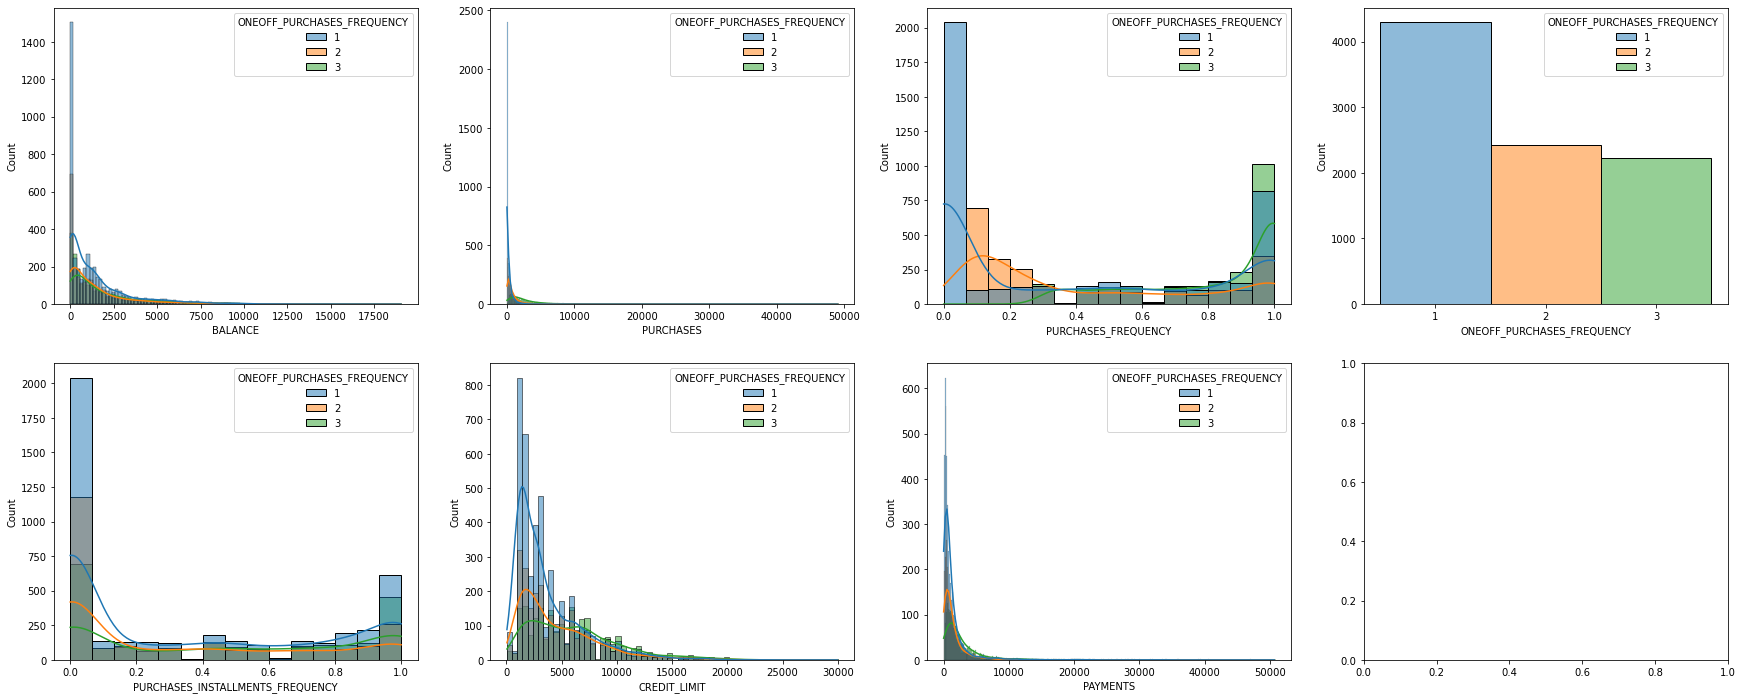

In [105]:
histPlot(numDfGroup4, 'ONEOFF_PURCHASES_FREQUENCY', 7)

- คนที่มี ONEOFF_PURCHASES_FREQUENCY กับ PURCHASES_INSTALLMENTS_FREQUENCY เท่ากัน ส่วนใหญ่จะมี PURCHASES_FREQUENCY น้อย

**PURCHASES_INSTALLMENTS_FREQUENCY**

In [106]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [107]:
numDfGroup5 = selectedNumDf.copy()
num = [-0.001, 0.17, 0.75, 1.00]
balanceGroup=['1','2','3']
numDfGroup5['PURCHASES_INSTALLMENTS_FREQUENCY']=pd.cut(df['PURCHASES_INSTALLMENTS_FREQUENCY'], num, labels= balanceGroup)
numDfGroup5.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                    0.000000   
1  3202.467416       0.00             0.000000                    0.000000   
2  2495.148862     773.17             1.000000                    1.000000   
3  1666.670542    1499.00             0.083333                    0.083333   
4   817.714335      16.00             0.083333                    0.083333   

  PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                                1        1000.0   201.802084  
1                                1        7000.0  4103.032597  
2                                1        7500.0   622.066742  
3                                1        7500.0     0.000000  
4                                1        1200.0   678.334763

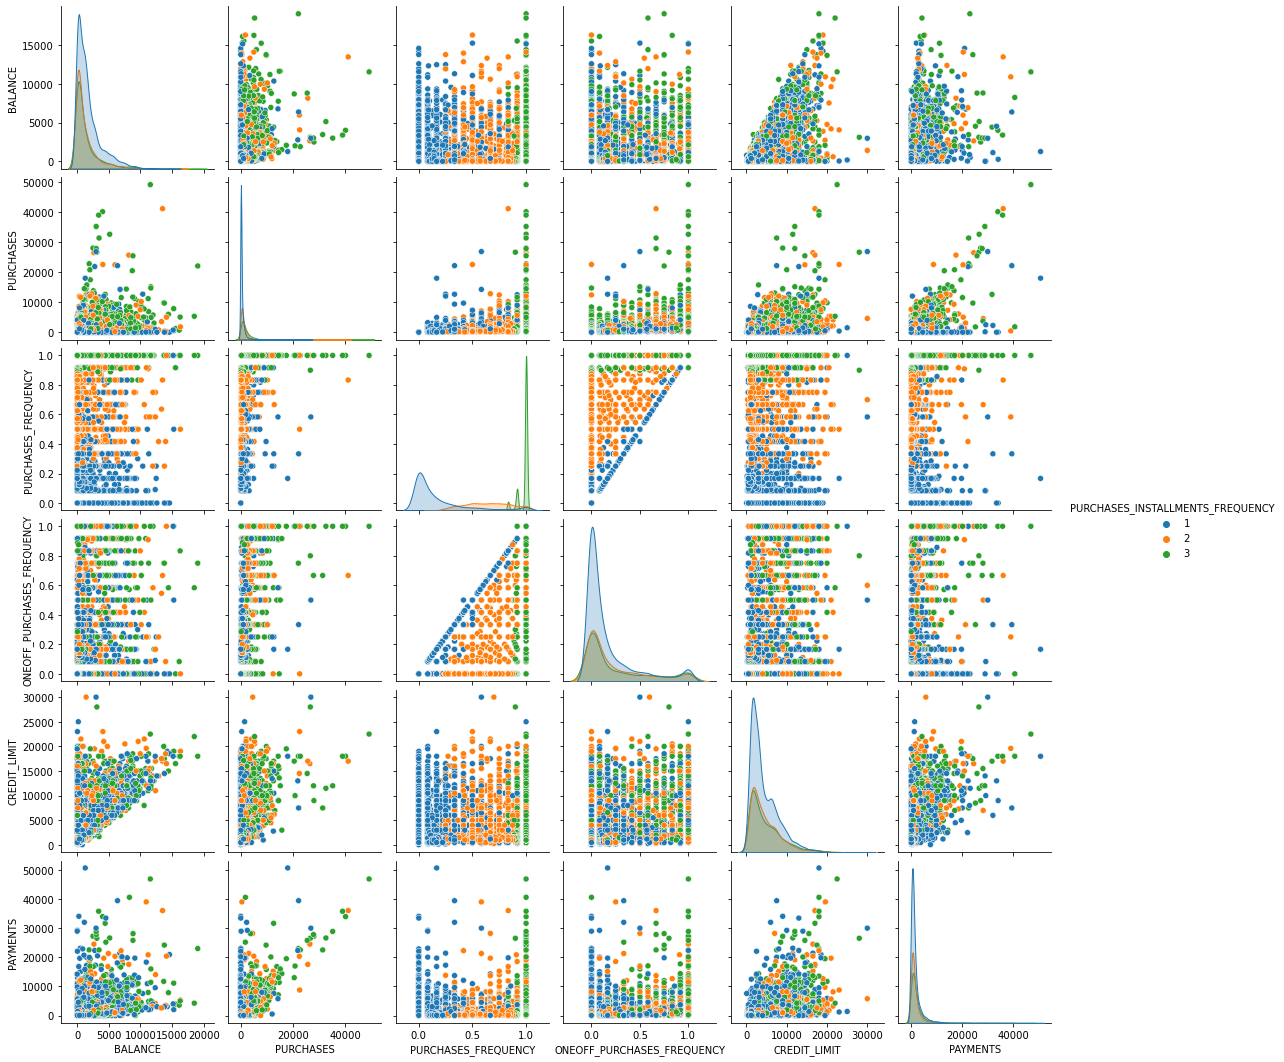

In [108]:
sns.pairplot(data=numDfGroup5, hue='PURCHASES_INSTALLMENTS_FREQUENCY')

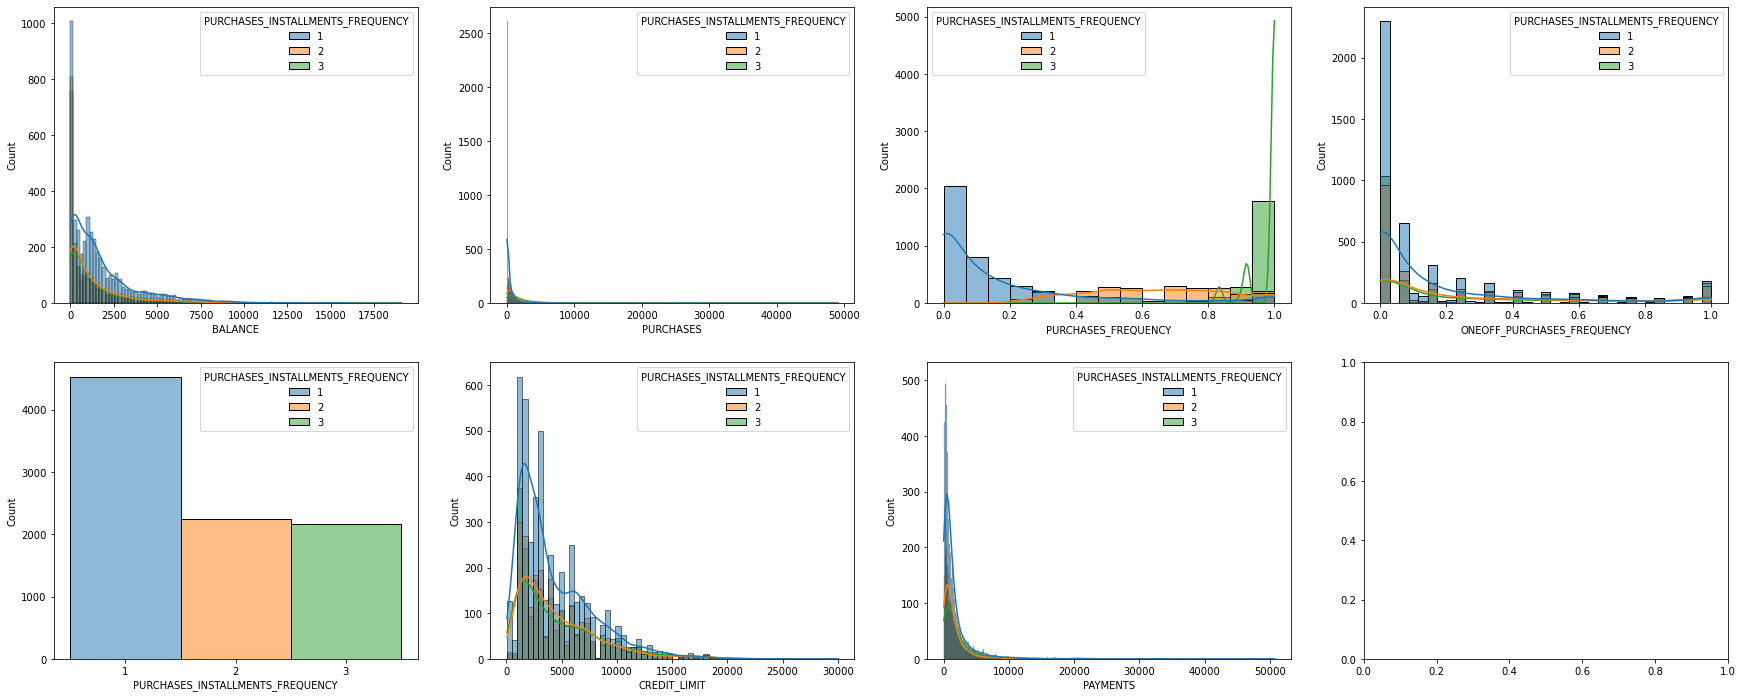

In [109]:
histPlot(numDfGroup5, 'PURCHASES_INSTALLMENTS_FREQUENCY', 7)

- ถ้าจ่ายด้วยราคาสูง มักจะจ่ายแบบผ่อนมากกว่าจ่ายครั้งเดียว

**CREDIT_LIMIT**

In [110]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [111]:
numDfGroup6 = selectedNumDf.copy()
num = [49.0, 1600.0, 3000.0, 6500.0, 30000.0]
balanceGroup=['1','2','3', '4']
numDfGroup6['CREDIT_LIMIT']=pd.cut(df['CREDIT_LIMIT'], num, labels= balanceGroup)
numDfGroup6.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                    0.000000   
1  3202.467416       0.00             0.000000                    0.000000   
2  2495.148862     773.17             1.000000                    1.000000   
3  1666.670542    1499.00             0.083333                    0.083333   
4   817.714335      16.00             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY CREDIT_LIMIT     PAYMENTS  
0                          0.083333            1   201.802084  
1                          0.000000            4  4103.032597  
2                          0.000000            4   622.066742  
3                          0.000000            4     0.000000  
4                          0.000000            1   678.334763

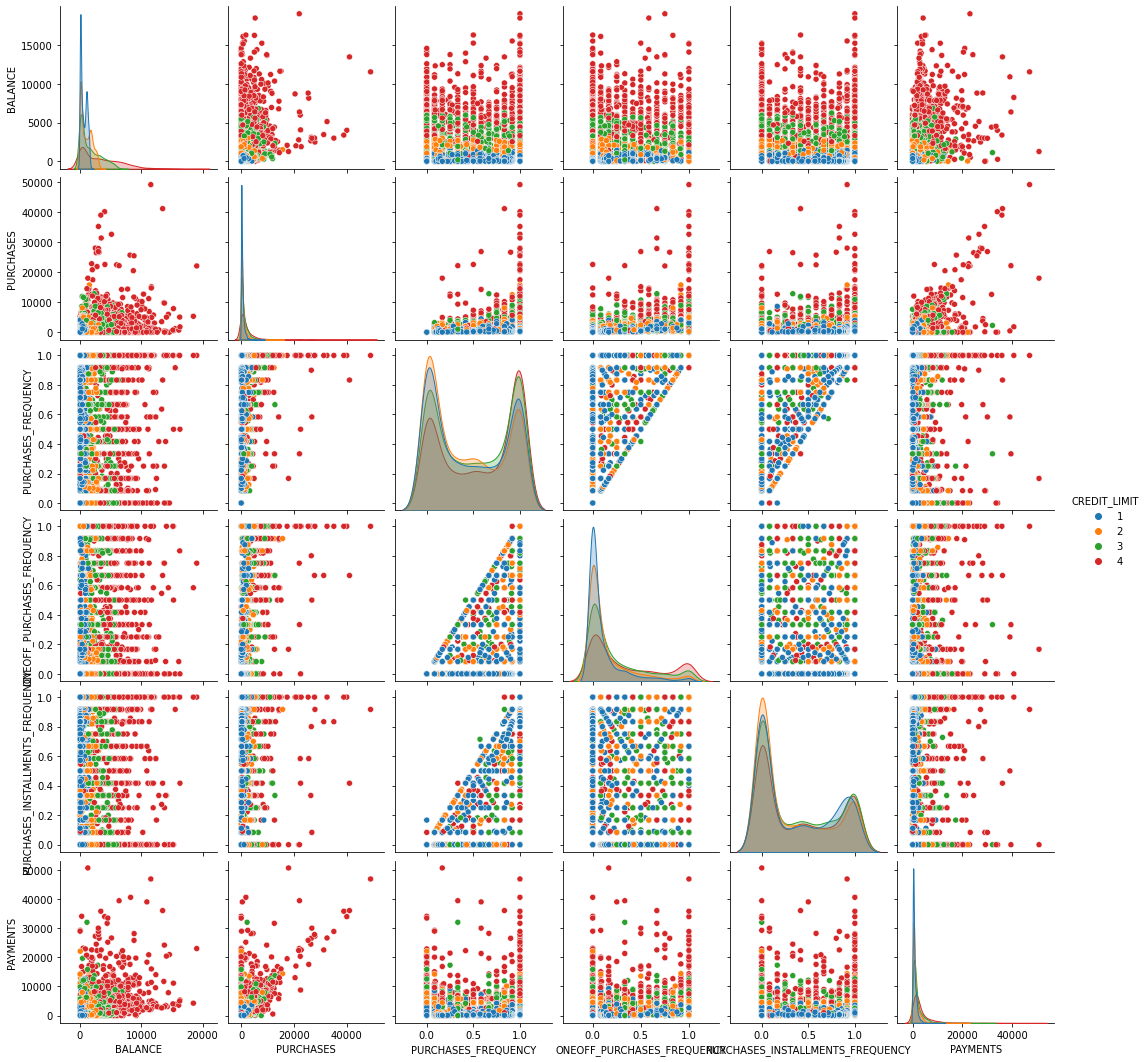

In [112]:
sns.pairplot(data=numDfGroup6, hue='CREDIT_LIMIT')

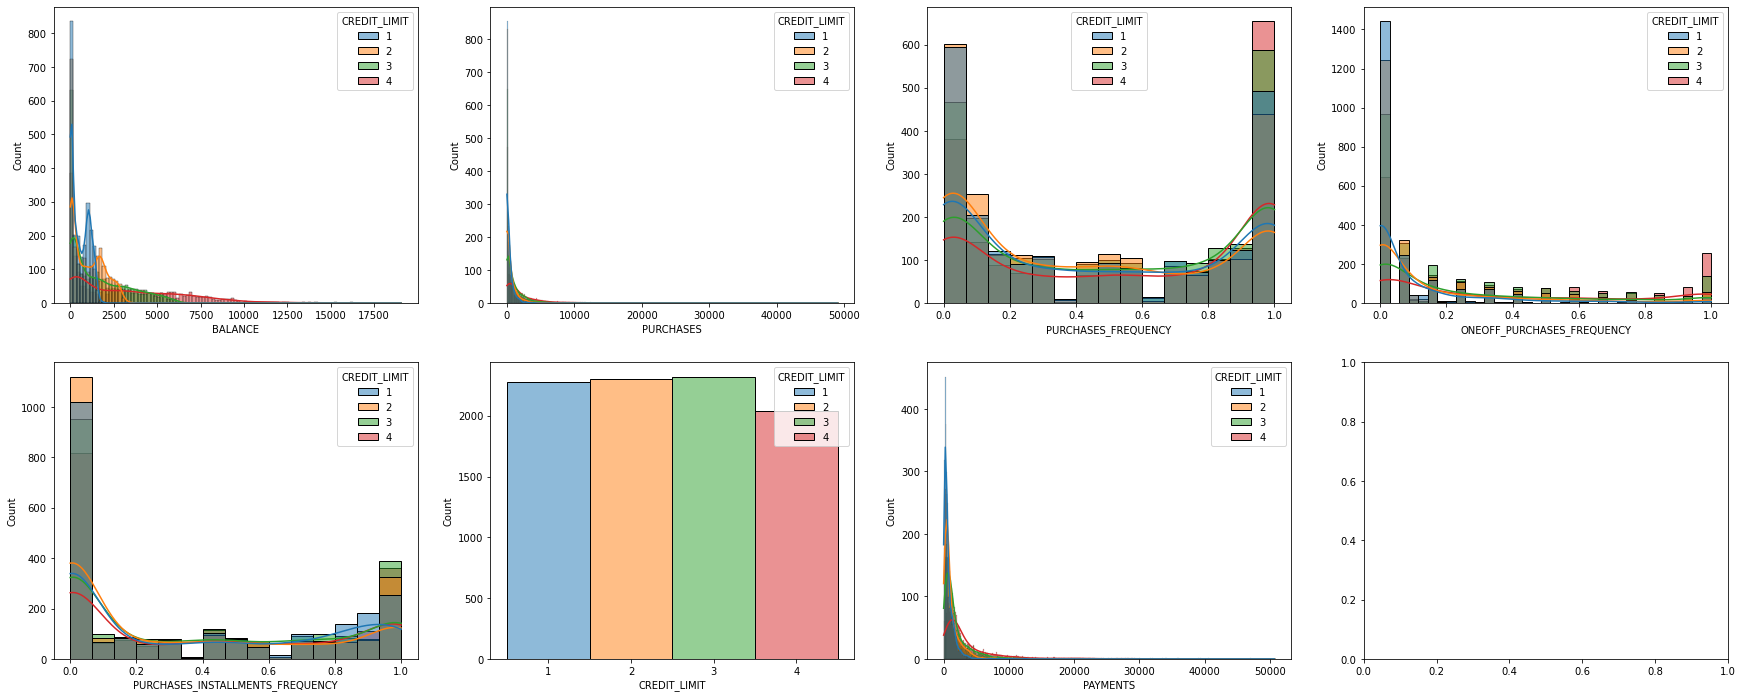

In [113]:
histPlot(numDfGroup6, 'CREDIT_LIMIT', 7)

- คนที่มี BALANCES ต่ำ จะมี CREDIT_LIMIT ต่ำ แต่ถ้า BALANCES สูงขึ้น มีแนวโน้มที่ CREDIT_LIMIT จะสูงตามไปด้วย
- คนที่มี CREDIT_LIMIT สูง มีแนวโน้มจ่ายแบบ ONEOFF_PURCHASES มากกว่าคนที่มี CREDIT_LIMIT ต่ำกว่า แต่ INSTALLMENTS_PURCHASES มีความใกล้เคียงกัน

**PAYMENTS**

In [114]:
numDf.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [115]:
numDfGroup7 = selectedNumDf.copy()
num = [-0.01, 383.276, 856.902, 1901.134, 50721.484]
balanceGroup=['1','2','3', '4']
numDfGroup7['PAYMENTS']=pd.cut(df['PAYMENTS'], num, labels= balanceGroup)
numDfGroup7.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                    0.000000   
1  3202.467416       0.00             0.000000                    0.000000   
2  2495.148862     773.17             1.000000                    1.000000   
3  1666.670542    1499.00             0.083333                    0.083333   
4   817.714335      16.00             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT PAYMENTS  
0                          0.083333        1000.0        1  
1                          0.000000        7000.0        4  
2                          0.000000        7500.0        2  
3                          0.000000        7500.0        1  
4                          0.000000        1200.0        2

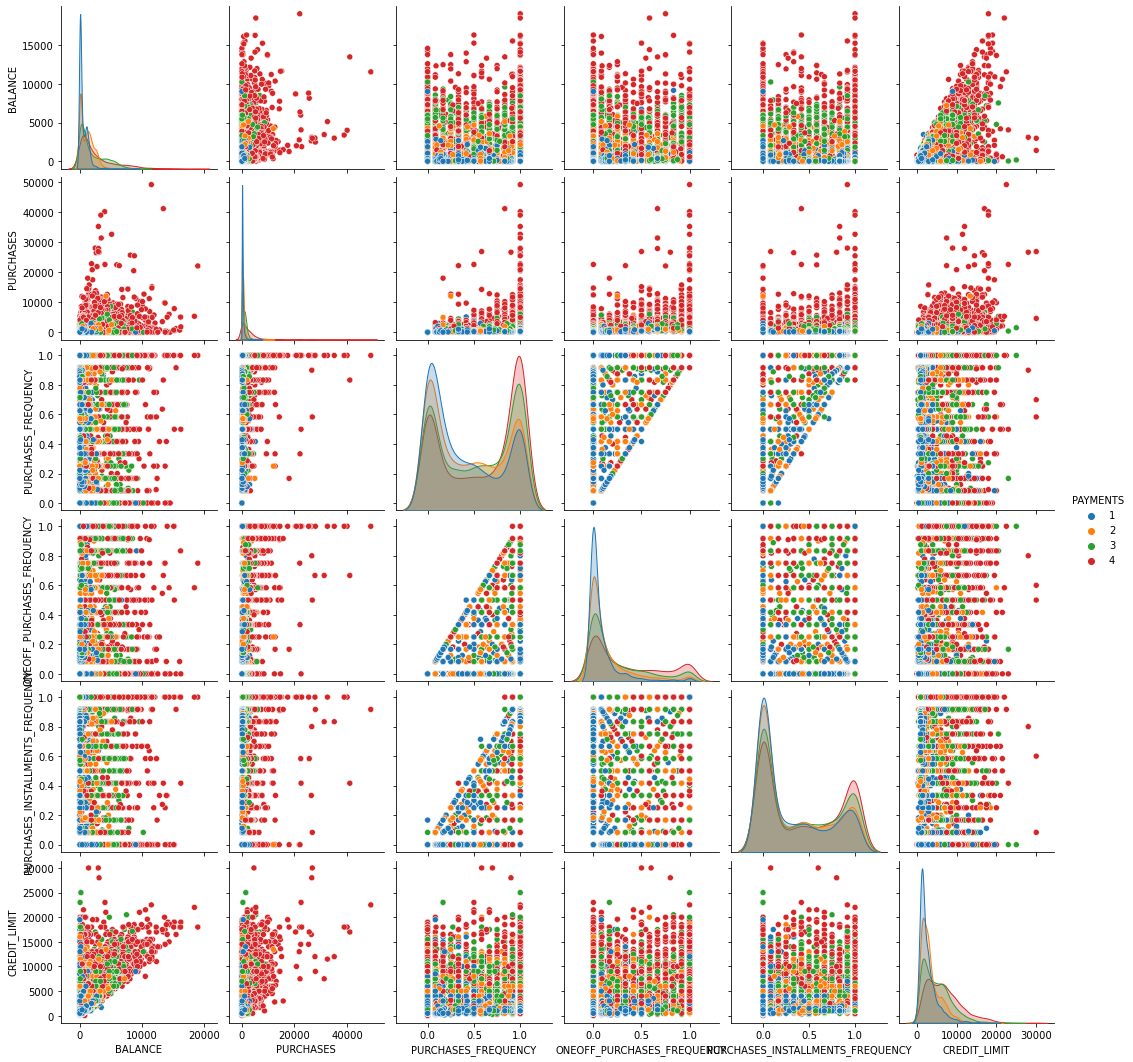

In [116]:
sns.pairplot(data=numDfGroup7, hue='PAYMENTS')

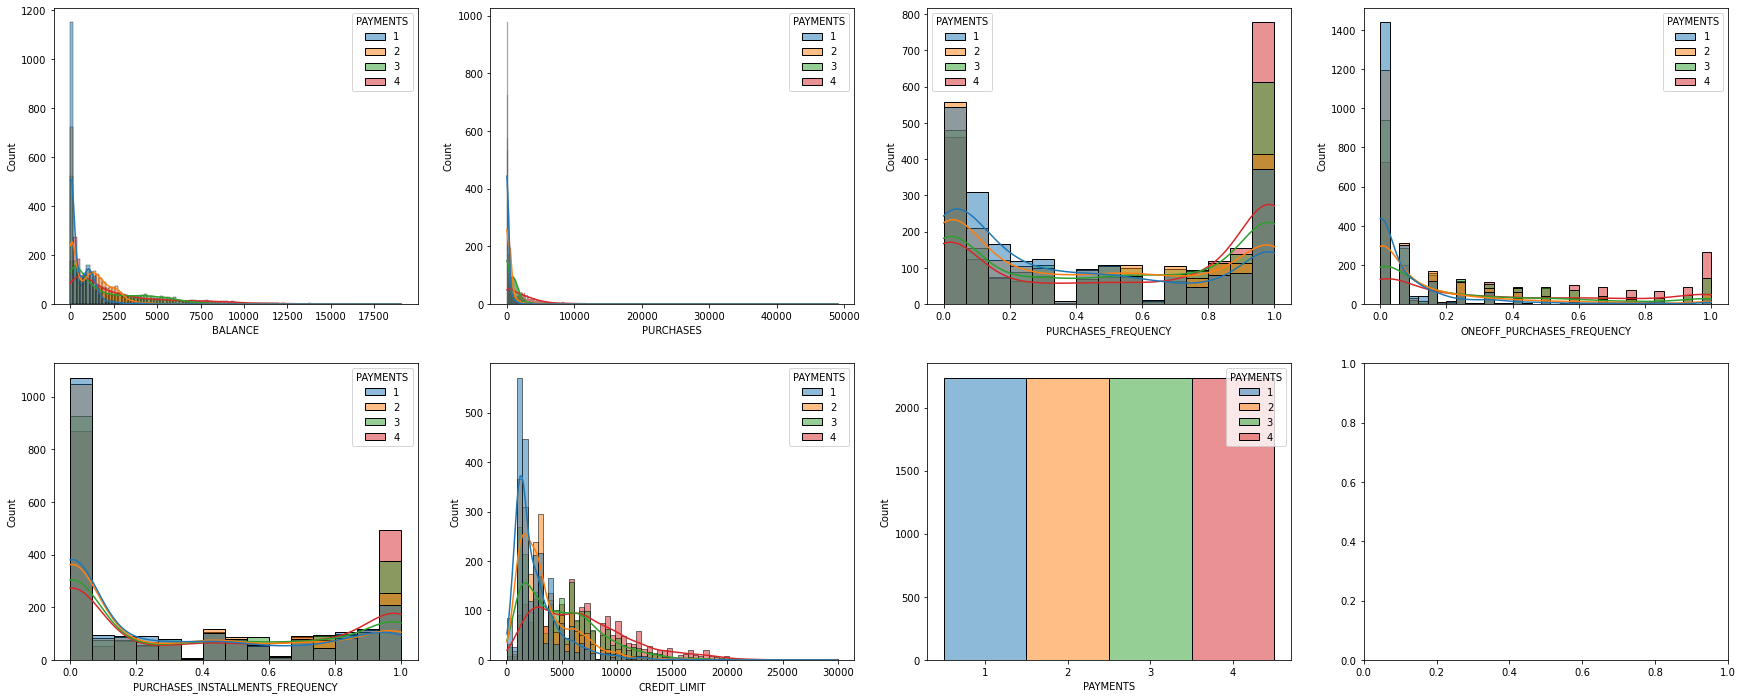

In [117]:
histPlot(numDfGroup7, 'PAYMENTS', 7)

- ความสัมพันธ์ของ BALANCES กับ CREDIT_LIMIT ไปในทางเดียวกัน แต่ไม่ทำให้เห็นการแบ่งกลุ่ม

### **2.Data Proprocessing**

#### **2.1 Remove outlier**


In [132]:
newNumDf = selectedNumDf.dropna().reset_index(drop=True)
newNumDf.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                    0.000000   
1  3202.467416       0.00             0.000000                    0.000000   
2  2495.148862     773.17             1.000000                    1.000000   
3  1666.670542    1499.00             0.083333                    0.083333   
4   817.714335      16.00             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                          0.083333        1000.0   201.802084  
1                          0.000000        7000.0  4103.032597  
2                          0.000000        7500.0   622.066742  
3                          0.000000        7500.0     0.000000  
4                          0.000000        1200.0   678.334763

In [57]:
newNumDf.isna().sum()

BALANCE                             0
PURCHASES                           0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CREDIT_LIMIT                        0
PAYMENTS                            0
dtype: int64

#### **2.2 Fix skewed data**

In [55]:
from sklearn.preprocessing import QuantileTransformer

def transform(df):
    numDfNorm = df.copy()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    for i in df.columns:
        array = np.array(df[i]).reshape(-1, 1)
        numDfNorm[i] = qt.fit_transform(array)

    return numDfNorm

In [58]:
numDfNorm = transform(newNumDf)
numDfNorm.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0 -1.072737  -0.506220            -0.407873                   -5.199338   
1  1.040676  -5.199338            -5.199338                   -5.199338   
2  0.816201   0.435382             5.199338                    5.199338   
3  0.509369   0.883238            -0.626385                    0.105686   
4 -0.038047  -0.727597            -0.626385                    0.105686   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT  PAYMENTS  
0                         -0.118323     -1.562219 -1.188338  
1                         -5.199338      0.804962  1.325624  
2                         -5.199338      0.921646 -0.256731  
3                         -5.199338      0.921646 -5.199338  
4                         -5.199338     -1.134671 -0.187431

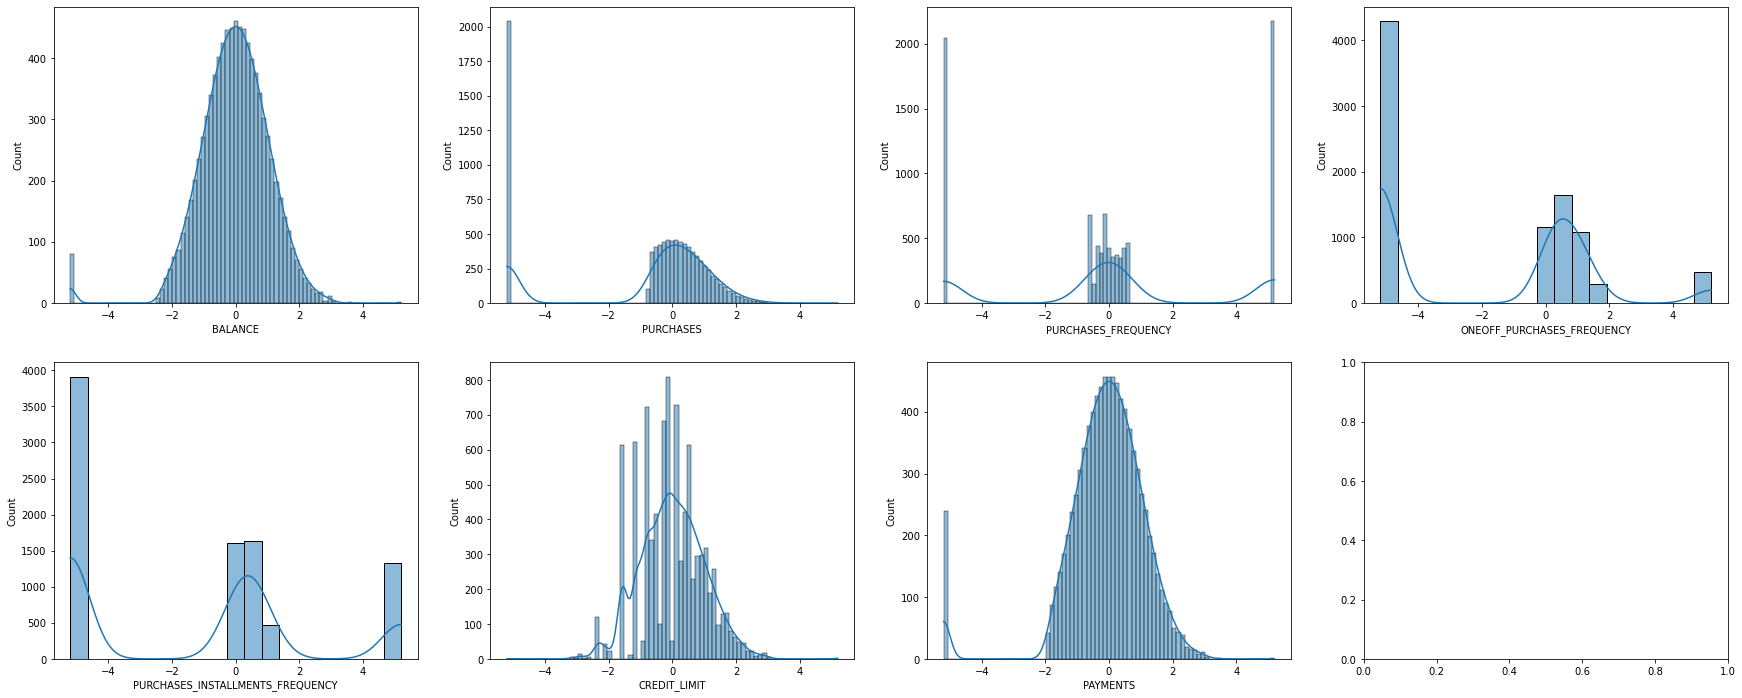

In [65]:
histPlot(numDfNorm, None, 7)

#### **2.4 Scale numeric data**


In [68]:
from sklearn.preprocessing import MinMaxScaler

def scale(df):
    minMaxScaler = MinMaxScaler()

    # numDfMinMax : array
    numDfMinMax = minMaxScaler.fit_transform(df)
    # print(numDfMinMax)

    # change array to dataframe
    numDfMScale = pd.DataFrame(numDfMinMax, columns=df.columns)
    
    return numDfMScale

In [70]:
numDfScale = scale(numDfNorm)
numDfScale.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0  0.396839   0.451319             0.460776                    0.000000   
1  0.600078   0.000000             0.000000                    0.000000   
2  0.578491   0.541869             1.000000                    1.000000   
3  0.548984   0.584938             0.439763                    0.510163   
4  0.496341   0.430030             0.439763                    0.510163   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT  PAYMENTS  
0                          0.488621      0.349768  0.385722  
1                          0.000000      0.577410  0.627480  
2                          0.000000      0.588631  0.475311  
3                          0.000000      0.588631  0.000000  
4                          0.000000      0.390883  0.481975

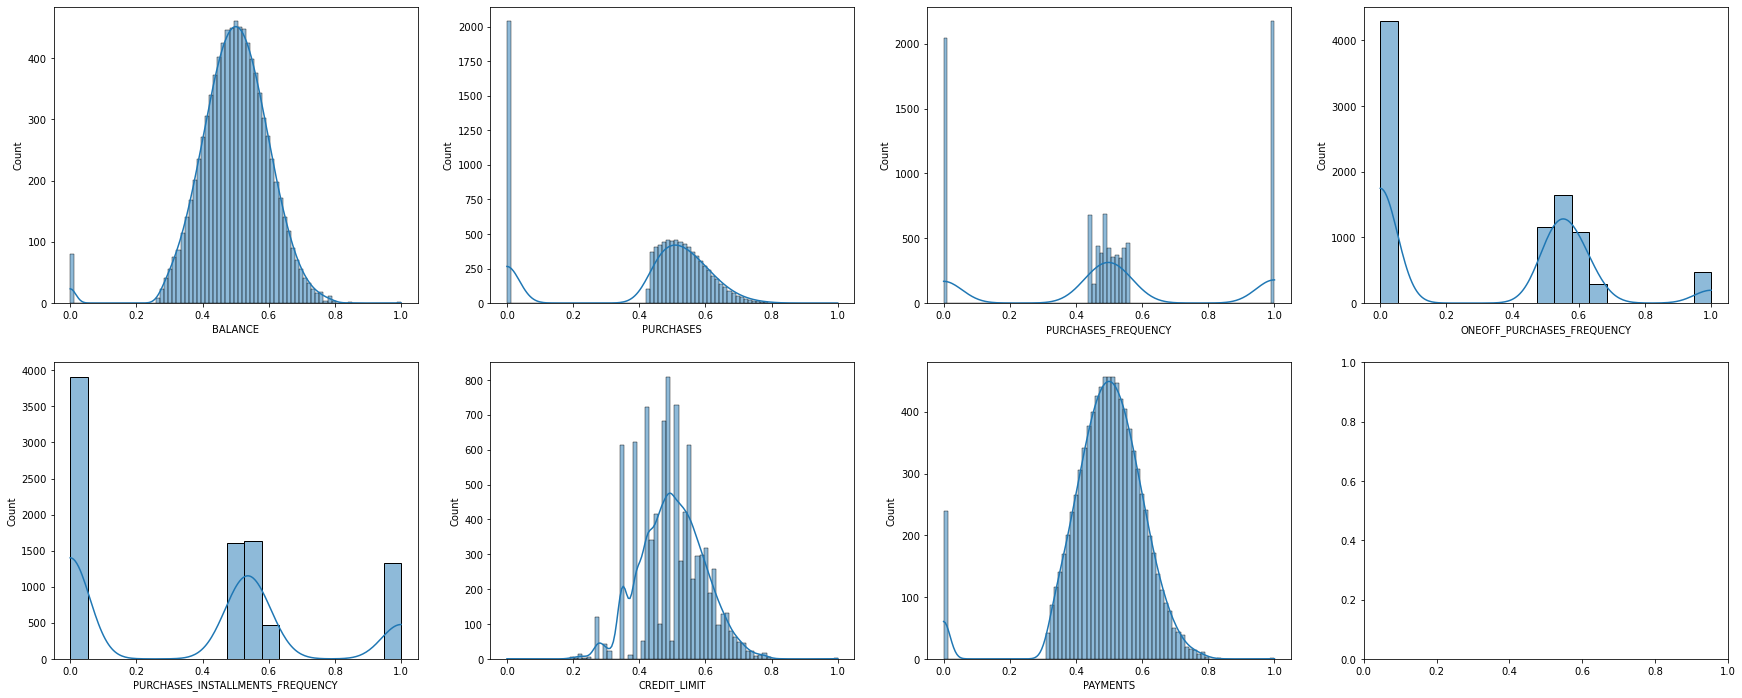

In [71]:
histPlot(numDfScale, None, 7)

### **3.Clustering and Result Analysis**

##### **K-means Clustering Function**

**findk()**

เป็น function สำหรับหาจำนวน cluster (k) โดยใช้ WCSS และ elbow methed ในการเลือก k

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def findk(x_train):
    K = [i+2 for i in range(9)]
    wcss = []
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=1)
        model = kmeans.fit(x_train)
        wcss.append(model.inertia_)

    plt.scatter(K, wcss)
    plt.plot(K, wcss)
    plt.title('WCSS')
    plt.ylabel('Scores')
    plt.xlabel('k')

    plt.show()

**kmeans()**

เป็น function สำหรับทำ k-means clustering

In [23]:
def kmeans(x, k):
    kmeans = KMeans(n_clusters=k, random_state=1)
    model = kmeans.fit(x)

    # predict
    y = model.predict(x)

    # convert array to dataframe
    y = pd.DataFrame(y, columns=['y_pred'])

    # print model parameters
    print(model.get_params())
    
    return model, y

**findCentroid()**

เป็น function สำหรับหา centroid ของแต่ละ feature ในแต่ละ cluster

In [50]:
def findCentroid(model, x_train):
    centroid = model.cluster_centers_
    featureCen = [[] for i in range(centroid.shape[1])]
    for i in range(centroid.shape[1]):
        for j in range(centroid.shape[0]):
            featureCen[i].append(centroid[j,i])
        print(x_train.columns[i], featureCen[i])
    return featureCen

**sepCluster()**

เป็น function สำหรับแยกข้อมูลในแต่ละ cluster

In [25]:
def sepCluster(df, colName, n):
    clusterDf = []
    for i in range(n):
        clusterDf.append((df[df[colName] == i]).loc[:, df.columns != colName])
    return clusterDf

#### **3.1 K-means clustering 1**

In [133]:
dfModel1 = newNumDf.copy()
dfModel1.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                    0.000000   
1  3202.467416       0.00             0.000000                    0.000000   
2  2495.148862     773.17             1.000000                    1.000000   
3  1666.670542    1499.00             0.083333                    0.083333   
4   817.714335      16.00             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
0                          0.083333        1000.0   201.802084  
1                          0.000000        7000.0  4103.032597  
2                          0.000000        7500.0   622.066742  
3                          0.000000        7500.0     0.000000  
4                          0.000000        1200.0   678.334763

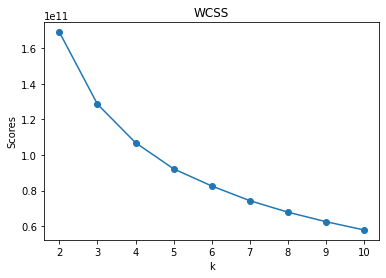

In [134]:
findk(dfModel1)

In [135]:
model, y_pred = kmeans(dfModel1, 4)

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'n_init': 10, 'random_state': 1, 'tol': 0.0001, 'verbose': 0}


In [136]:
featureCen = findCentroid(model, dfModel1)

BALANCE [788.761910967219, 1868.932425122111, 5047.509911416379, 4608.794345717949]
PURCHASES [490.6443732538637, 1304.5071610169489, 1954.1553402537484, 10800.515811965812]
PURCHASES_FREQUENCY [0.4472216695846528, 0.5480421856702621, 0.5540880357554787, 0.7213027606837608]
ONEOFF_PURCHASES_FREQUENCY [0.12585069286645556, 0.300749565100154, 0.33327767935409447, 0.5692844358974358]
PURCHASES_INSTALLMENTS_FREQUENCY [0.3449733384242878, 0.382870873651772, 0.3995582064590543, 0.5914752136752137]
CREDIT_LIMIT [2162.6877548063076, 6502.485758976501, 11822.727272727807, 12637.606837606838]
PAYMENTS [867.1272658526727, 2089.647224765023, 3666.0816629665514, 19254.744854358978]


**Seperate cluster**

In [137]:
dfResult = pd.concat([dfModel1, y_pred], axis=1)
dfCluster = sepCluster(dfResult, 'y_pred', 4)
dfResult.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             0.166667                    0.000000   
1  3202.467416       0.00             0.000000                    0.000000   
2  2495.148862     773.17             1.000000                    1.000000   
3  1666.670542    1499.00             0.083333                    0.083333   
4   817.714335      16.00             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  y_pred  
0                          0.083333        1000.0   201.802084       0  
1                          0.000000        7000.0  4103.032597       1  
2                          0.000000        7500.0   622.066742       1  
3                          0.000000        7500.0     0.000000       1  
4                          0.000000        1200.0   678.334763       0

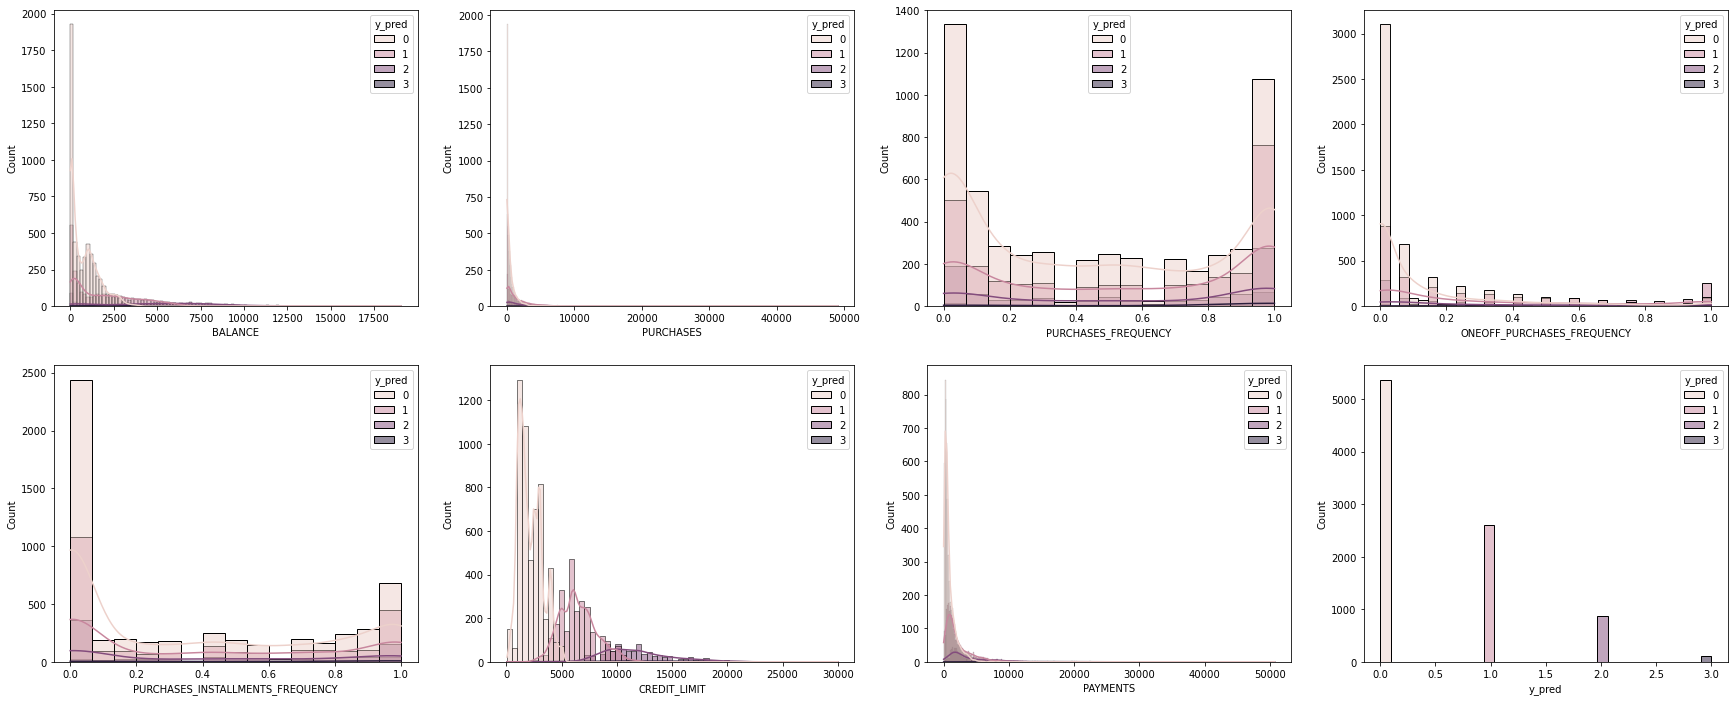

In [140]:
histPlot(dfResult, 'y_pred', 8)

**Cluster Detail**

1. Cluster 0

    - มี BALANCE, PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CREDIT_LIMIT, PAYMENTS ต่ำที่สุด
    - มี PURCHASES_INSTALLMENTS_FREQUENCY สูงกว่า ONEOFF_PURCHASES_FREQUENCY ค่อนข้างมากกว่า Cluster อื่น ๆ 

2. Cluster 1

    - มี BALANCE, PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CREDIT_LIMIT, PAYMENTS ปานกลาง

3. Cluster 2

    - มี BALANCE สูงที่สุด และมี CREDIT_LIMIT สูงกว่า Cluster 3 แต่มี PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PAYMENTS ปานกลาง

4. Cluster 3

    - มี PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PAYMENTS สูงกว่า Cluster อื่น ๆ อย่างเห็นได้ชัด และมี CREDIT_LIMIT สูงใกล้เดียง Cluster 2 แต่มี BALANCE ต่ำกว่า Cluster 2

**Result Analysis**

1. Cluster 0

    - เป็นกลุ่มคนที่มีรายได้น้อย ใช้จ่ายน้อย และมีแนวโน้มจ่ายแบบผ่อนมากกว่าจ่ายทีเดียว

2. Cluster 1

    - เป็นกลุ่มคนที่มีรายได้ปานกลาง ใช้จ่ายปานกลาง และมีลักษณะการใช้จ่าย (ผ่อน/จ่ายทีเดียว) ใกล้เคียงกัน

3. Cluster 2

    - เป็นกลุ่มคนที่มีรายได้เยอะ แต่ใช้จ่ายปานกลาง และมีลักษณะการใช้จ่าย (ผ่อน/จ่ายทีเดียว) ใกล้เคียงกัน

4. Cluster 3

    - เป็นกลุ่มคนที่มีรายได้เยอะ ใช้จ่ายเยอะ และมีลักษณะการใช้จ่าย (ผ่อน/จ่ายทีเดียว) ใกล้เคียงกัน